In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
df = pd.read_csv("Activities.csv")

In [4]:
df.head()

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Max Run Cadence,Avg Speed,Max Speed,Total Ascent,Total Descent,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Avg Ground Contact Time,Avg GCT Balance,Avg Bike Cadence,Training Stress Score®,Grit,Flow,Total Reps,Total Sets,Dive Time,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Laps,Max Temp,Avg Resp,Min Resp,Max Resp,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Strength Training,2022-03-17 08:58:59,False,Strength,0.00,126,00:30:19,98,127,0.3,--,--,--,--,--,--,0.00,0.0,0.0,--,--,--,0.0,0.0,0.0,5,1,0:00,62.6,0:00,No,30:18.72,1,0.0,20,9,29,00:30:19,00:30:19,--,--
1,Strength Training,2022-03-14 08:56:33,False,Strength,0.00,36,00:13:36,85,120,0.1,--,--,--,--,--,--,0.00,0.0,0.0,--,--,--,0.0,0.0,0.0,5,1,0:00,62.6,0:00,No,13:35.97,1,0.0,16,11,22,00:13:36,00:13:36,--,--
2,Strength Training,2022-03-10 09:25:11,False,Strength,0.00,168,00:30:46,112,154,1.1,--,--,--,--,--,--,0.00,0.0,0.0,--,--,--,0.0,0.0,0.0,4,1,0:00,64.4,0:00,No,30:45.59,1,0.0,21,11,32,00:30:46,00:30:46,--,--
3,Running,2022-02-27 16:53:44,False,Clark County Running,13.05,"1,510",01:57:41,174,193,5.0,175,206,9:01,6:39,189,209,1.01,6.2,6.5,273,51.7% L / 48.3% R,--,0.0,0.0,0.0,--,--,0:00,68.0,0:00,No,00:21.09,14,0.0,39,24,50,01:57:34,01:57:41,"1,924","2,121"
4,Cardio,2022-02-24 09:36:34,False,Cardio,0.00,222,00:18:58,159,183,3.2,--,--,--,--,--,--,0.00,0.0,0.0,--,--,--,0.0,0.0,0.0,--,--,0:00,73.4,0:00,No,18:57.94,1,0.0,38,17,50,00:00:00,00:18:58,--,--


In [5]:
df = df[
    [
        "Date",
        "Activity Type",
        "Distance",
        "Time",
        "Avg HR",
        "Max HR",
        "Avg Speed",
    ]
][
    (df["Activity Type"] == "Running")
    | (df["Activity Type"] == "Hiking")
    | (df["Activity Type"] == "Treadmill Running")
    | (df["Activity Type"] == "Mountaineering")
    | (df["Activity Type"] == "Cardio")
]

In [6]:
df.reset_index(drop=True, inplace=True)

In [7]:
df.head()

,Date,Activity Type,Distance,Time,Avg HR,Max HR,Avg Speed
0,2022-02-27 16:53:44,Running,13.05,01:57:41,174,193,9:01
1,2022-02-24 09:36:34,Cardio,0.00,00:18:58,159,183,--
2,2022-02-12 13:45:31,Cardio,0.00,00:38:09,179,193,--
3,2022-02-09 14:16:41,Running,4.30,00:44:13,139,153,10:16
4,2022-02-07 13:46:00,Running,9.01,01:43:44,142,156,11:31


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           286 non-null    object 
 1   Activity Type  286 non-null    object 
 2   Distance       286 non-null    float64
 3   Time           286 non-null    object 
 4   Avg HR         286 non-null    object 
 5   Max HR         286 non-null    object 
 6   Avg Speed      286 non-null    object 
dtypes: float64(1), object(6)
memory usage: 15.8+ KB


In [9]:
df["Date"] = df["Date"].str[:10]

In [10]:
df.head()

,Date,Activity Type,Distance,Time,Avg HR,Max HR,Avg Speed
0,2022-02-27,Running,13.05,01:57:41,174,193,9:01
1,2022-02-24,Cardio,0.00,00:18:58,159,183,--
2,2022-02-12,Cardio,0.00,00:38:09,179,193,--
3,2022-02-09,Running,4.30,00:44:13,139,153,10:16
4,2022-02-07,Running,9.01,01:43:44,142,156,11:31


In [11]:
df["Date"] = pd.to_datetime(df["Date"])

In [12]:
df.head()

,Date,Activity Type,Distance,Time,Avg HR,Max HR,Avg Speed
0,2022-02-27,Running,13.05,01:57:41,174,193,9:01
1,2022-02-24,Cardio,0.00,00:18:58,159,183,--
2,2022-02-12,Cardio,0.00,00:38:09,179,193,--
3,2022-02-09,Running,4.30,00:44:13,139,153,10:16
4,2022-02-07,Running,9.01,01:43:44,142,156,11:31


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           286 non-null    datetime64[ns]
 1   Activity Type  286 non-null    object        
 2   Distance       286 non-null    float64       
 3   Time           286 non-null    object        
 4   Avg HR         286 non-null    object        
 5   Max HR         286 non-null    object        
 6   Avg Speed      286 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 15.8+ KB


In [14]:
df["Time"].loc[65]

'00:07:26.7'

In [15]:
df["Time"] = df["Time"].str.split(".").str[0]

In [16]:
df["Time"].head()

0    01:57:41
1    00:18:58
2    00:38:09
3    00:44:13
4    01:43:44
Name: Time, dtype: object

In [17]:
df["Cum_Min"] = df["Time"].apply(
    lambda x: (int(x.split(":")[0]) * 60) + int(x.split(":")[1])
)

In [18]:
df["Sec"] = df["Time"].apply(lambda x: int(x.split(":")[2]))

In [19]:
df["Cum_Sec_Monthly"] = df.groupby([df["Date"].dt.month, df["Date"].dt.year])[
    "Sec"
].transform(lambda x: x.sum())

In [20]:
df["Cum_Min_Monthly"] = df.groupby([df["Date"].dt.month, df["Date"].dt.year])[
    "Cum_Min"
].transform(lambda x: x.sum())

In [21]:
df.head()

,Date,Activity Type,Distance,Time,Avg HR,Max HR,Avg Speed,Cum_Min,Sec,Cum_Sec_Monthly,Cum_Min_Monthly
0,2022-02-27,Running,13.05,01:57:41,174,193,9:01,117,41,165,320
1,2022-02-24,Cardio,0.00,00:18:58,159,183,--,18,58,165,320
2,2022-02-12,Cardio,0.00,00:38:09,179,193,--,38,9,165,320
3,2022-02-09,Running,4.30,00:44:13,139,153,10:16,44,13,165,320
4,2022-02-07,Running,9.01,01:43:44,142,156,11:31,103,44,165,320


In [22]:
df["Cum_Min_Monthly"] = (
    df["Cum_Min_Monthly"] + divmod(df["Cum_Sec_Monthly"], 60)[0]
)

In [23]:
df["Cum_Hr_Monthly"] = df["Cum_Min_Monthly"] / 60

In [24]:
df["Cum_Miles_Monthly"] = df.groupby(
    [df["Date"].dt.month, df["Date"].dt.year]
)["Distance"].transform(lambda x: x.sum())

In [25]:
df["Activity Type"].value_counts()

Running              156
Treadmill Running     97
Hiking                25
Cardio                 5
Mountaineering         3
Name: Activity Type, dtype: int64

In [26]:
df[df["Avg HR"] == "--"]

,Date,Activity Type,Distance,Time,Avg HR,Max HR,Avg Speed,Cum_Min,Sec,Cum_Sec_Monthly,Cum_Min_Monthly,Cum_Hr_Monthly,Cum_Miles_Monthly
219,2016-07-25,Hiking,5.75,03:14:00,--,--,33:44,194,0,244,1152,19.200000,29.72
220,2016-07-24,Mountaineering,4.13,03:13:04,--,--,1.3,193,4,244,1152,19.200000,29.72
221,2016-07-24,Mountaineering,6.04,05:43:53,--,--,1.1,343,53,244,1152,19.200000,29.72
222,2016-07-23,Mountaineering,2.78,02:01:55,--,--,1.4,121,55,244,1152,19.200000,29.72
265,2016-02-09,Running,4.16,02:44:33,--,--,39:30,164,33,359,908,15.133333,18.01
267,2016-02-05,Running,1.24,01:29:49,--,--,--,89,49,359,908,15.133333,18.01


In [27]:
df.loc[df["Avg HR"] == "--", "Avg HR"] = np.nan

In [28]:
df["Avg HR"] = df["Avg HR"].astype(float)

In [29]:
df["Base_Run_Pace"] = df["Avg Speed"][
    (df["Activity Type"] == "Running") & (df["Avg HR"] < 146)
]

df["Base_Run_HR"] = df["Avg HR"][
    (df["Activity Type"] == "Running") & (df["Avg HR"] < 146)
]

In [30]:
df["Base_Run_Pace_Sec"] = df["Base_Run_Pace"][
    df["Base_Run_Pace"].notnull()
].apply(lambda x: (int(x.split(":")[0]) * 60) + int(x.split(":")[1]))

In [31]:
df.head()

,Date,Activity Type,Distance,Time,Avg HR,Max HR,Avg Speed,Cum_Min,Sec,Cum_Sec_Monthly,Cum_Min_Monthly,Cum_Hr_Monthly,Cum_Miles_Monthly,Base_Run_Pace,Base_Run_HR,Base_Run_Pace_Sec
0,2022-02-27,Running,13.05,01:57:41,174.0,193,9:01,117,41,165,322,5.366667,26.36,NaN,NaN,NaN
1,2022-02-24,Cardio,0.00,00:18:58,159.0,183,--,18,58,165,322,5.366667,26.36,NaN,NaN,NaN
2,2022-02-12,Cardio,0.00,00:38:09,179.0,193,--,38,9,165,322,5.366667,26.36,NaN,NaN,NaN
3,2022-02-09,Running,4.30,00:44:13,139.0,153,10:16,44,13,165,322,5.366667,26.36,10:16,139.0,616.0
4,2022-02-07,Running,9.01,01:43:44,142.0,156,11:31,103,44,165,322,5.366667,26.36,11:31,142.0,691.0


In [32]:
df["Fast_Run_Pace"] = df["Avg Speed"][
    (df["Activity Type"] == "Running") & (df["Avg HR"] >= 146)
]

df["Fast_Run_HR"] = df["Avg HR"][
    (df["Activity Type"] == "Running") & (df["Avg HR"] >= 146)
]

In [33]:
df["Fast_Run_Pace_Sec"] = df["Fast_Run_Pace"][
    df["Fast_Run_Pace"].notnull()
].apply(lambda x: (int(x.split(":")[0]) * 60) + int(x.split(":")[1]))

In [34]:
df.head()

,Date,Activity Type,Distance,Time,Avg HR,Max HR,Avg Speed,Cum_Min,Sec,Cum_Sec_Monthly,Cum_Min_Monthly,Cum_Hr_Monthly,Cum_Miles_Monthly,Base_Run_Pace,Base_Run_HR,Base_Run_Pace_Sec,Fast_Run_Pace,Fast_Run_HR,Fast_Run_Pace_Sec
0,2022-02-27,Running,13.05,01:57:41,174.0,193,9:01,117,41,165,322,5.366667,26.36,NaN,NaN,NaN,9:01,174.0,541.0
1,2022-02-24,Cardio,0.00,00:18:58,159.0,183,--,18,58,165,322,5.366667,26.36,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-02-12,Cardio,0.00,00:38:09,179.0,193,--,38,9,165,322,5.366667,26.36,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-09,Running,4.30,00:44:13,139.0,153,10:16,44,13,165,322,5.366667,26.36,10:16,139.0,616.0,NaN,NaN,NaN
4,2022-02-07,Running,9.01,01:43:44,142.0,156,11:31,103,44,165,322,5.366667,26.36,11:31,142.0,691.0,NaN,NaN,NaN


In [35]:
df["Base_Run_Pace_Avg_Sec"] = df.groupby(
    [df["Date"].dt.month, df["Date"].dt.year]
)["Base_Run_Pace_Sec"].transform(lambda x: x.mean())

df["Base_Run_HR_Avg"] = df.groupby([df["Date"].dt.month, df["Date"].dt.year])[
    "Base_Run_HR"
].transform(lambda x: x.mean())

df["Fast_Run_Pace_Avg_Sec"] = df.groupby(
    [df["Date"].dt.month, df["Date"].dt.year]
)["Fast_Run_Pace_Sec"].transform(lambda x: x.mean())

df["Fast_Run_HR_Avg"] = df.groupby([df["Date"].dt.month, df["Date"].dt.year])[
    "Fast_Run_HR"
].transform(lambda x: x.mean())

In [36]:
df.head()

,Date,Activity Type,Distance,Time,Avg HR,Max HR,Avg Speed,Cum_Min,Sec,Cum_Sec_Monthly,Cum_Min_Monthly,Cum_Hr_Monthly,Cum_Miles_Monthly,Base_Run_Pace,Base_Run_HR,Base_Run_Pace_Sec,Fast_Run_Pace,Fast_Run_HR,Fast_Run_Pace_Sec,Base_Run_Pace_Avg_Sec,Base_Run_HR_Avg,Fast_Run_Pace_Avg_Sec,Fast_Run_HR_Avg
0,2022-02-27,Running,13.05,01:57:41,174.0,193,9:01,117,41,165,322,5.366667,26.36,NaN,NaN,NaN,9:01,174.0,541.0,653.5,140.5,541.0,174.0
1,2022-02-24,Cardio,0.00,00:18:58,159.0,183,--,18,58,165,322,5.366667,26.36,NaN,NaN,NaN,NaN,NaN,NaN,653.5,140.5,541.0,174.0
2,2022-02-12,Cardio,0.00,00:38:09,179.0,193,--,38,9,165,322,5.366667,26.36,NaN,NaN,NaN,NaN,NaN,NaN,653.5,140.5,541.0,174.0
3,2022-02-09,Running,4.30,00:44:13,139.0,153,10:16,44,13,165,322,5.366667,26.36,10:16,139.0,616.0,NaN,NaN,NaN,653.5,140.5,541.0,174.0
4,2022-02-07,Running,9.01,01:43:44,142.0,156,11:31,103,44,165,322,5.366667,26.36,11:31,142.0,691.0,NaN,NaN,NaN,653.5,140.5,541.0,174.0


In [37]:
divmod(541, 60)

(9, 1)

In [38]:
divmod(495, 60)

(8, 15)

In [39]:
df.head(10)

,Date,Activity Type,Distance,Time,Avg HR,Max HR,Avg Speed,Cum_Min,Sec,Cum_Sec_Monthly,Cum_Min_Monthly,Cum_Hr_Monthly,Cum_Miles_Monthly,Base_Run_Pace,Base_Run_HR,Base_Run_Pace_Sec,Fast_Run_Pace,Fast_Run_HR,Fast_Run_Pace_Sec,Base_Run_Pace_Avg_Sec,Base_Run_HR_Avg,Fast_Run_Pace_Avg_Sec,Fast_Run_HR_Avg
0,2022-02-27,Running,13.05,01:57:41,174.0,193,9:01,117,41,165,322,5.366667,26.36,NaN,NaN,NaN,9:01,174.0,541.0,653.500000,140.5,541.0,174.0
1,2022-02-24,Cardio,0.00,00:18:58,159.0,183,--,18,58,165,322,5.366667,26.36,NaN,NaN,NaN,NaN,NaN,NaN,653.500000,140.5,541.0,174.0
2,2022-02-12,Cardio,0.00,00:38:09,179.0,193,--,38,9,165,322,5.366667,26.36,NaN,NaN,NaN,NaN,NaN,NaN,653.500000,140.5,541.0,174.0
3,2022-02-09,Running,4.30,00:44:13,139.0,153,10:16,44,13,165,322,5.366667,26.36,10:16,139.0,616.0,NaN,NaN,NaN,653.500000,140.5,541.0,174.0
4,2022-02-07,Running,9.01,01:43:44,142.0,156,11:31,103,44,165,322,5.366667,26.36,11:31,142.0,691.0,NaN,NaN,NaN,653.500000,140.5,541.0,174.0
5,2022-01-30,Running,3.00,00:32:09,129.0,141,10:42,32,9,210,549,9.150000,47.02,10:42,129.0,642.0,NaN,NaN,NaN,673.166667,136.0,690.0,148.0
6,2022-01-29,Running,9.00,01:41:56,139.0,154,11:19,101,56,210,549,9.150000,47.02,11:19,139.0,679.0,NaN,NaN,NaN,673.166667,136.0,690.0,148.0
7,2022-01-27,Cardio,0.00,00:19:03,161.0,181,--,19,3,210,549,9.150000,47.02,NaN,NaN,NaN,NaN,NaN,NaN,673.166667,136.0,690.0,148.0
8,2022-01-23,Running,9.01,01:37:36,142.0,156,10:50,97,36,210,549,9.150000,47.02,10:50,142.0,650.0,NaN,NaN,NaN,673.166667,136.0,690.0,148.0
9,2022-01-18,Running,8.00,01:31:17,136.0,147,11:24,91,17,210,549,9.150000,47.02,11:24,136.0,684.0,NaN,NaN,NaN,673.166667,136.0,690.0,148.0


In [40]:
df["Base_Run_Pace_Avg"] = df["Base_Run_Pace_Avg_Sec"][
    df["Base_Run_Pace_Avg_Sec"].notnull()
].apply(
    lambda x: str(int(divmod(x, 60)[0])) + ":" + str(int(divmod(x, 60)[1]))
)

df["Fast_Run_Pace_Avg"] = df["Fast_Run_Pace_Avg_Sec"][
    df["Fast_Run_Pace_Avg_Sec"].notnull()
].apply(
    lambda x: str(int(divmod(x, 60)[0])) + ":" + str(int(divmod(x, 60)[1]))
)

In [41]:
df.head(10)

,Date,Activity Type,Distance,Time,Avg HR,Max HR,Avg Speed,Cum_Min,Sec,Cum_Sec_Monthly,Cum_Min_Monthly,Cum_Hr_Monthly,Cum_Miles_Monthly,Base_Run_Pace,Base_Run_HR,Base_Run_Pace_Sec,Fast_Run_Pace,Fast_Run_HR,Fast_Run_Pace_Sec,Base_Run_Pace_Avg_Sec,Base_Run_HR_Avg,Fast_Run_Pace_Avg_Sec,Fast_Run_HR_Avg,Base_Run_Pace_Avg,Fast_Run_Pace_Avg
0,2022-02-27,Running,13.05,01:57:41,174.0,193,9:01,117,41,165,322,5.366667,26.36,NaN,NaN,NaN,9:01,174.0,541.0,653.500000,140.5,541.0,174.0,10:53,9:1
1,2022-02-24,Cardio,0.00,00:18:58,159.0,183,--,18,58,165,322,5.366667,26.36,NaN,NaN,NaN,NaN,NaN,NaN,653.500000,140.5,541.0,174.0,10:53,9:1
2,2022-02-12,Cardio,0.00,00:38:09,179.0,193,--,38,9,165,322,5.366667,26.36,NaN,NaN,NaN,NaN,NaN,NaN,653.500000,140.5,541.0,174.0,10:53,9:1
3,2022-02-09,Running,4.30,00:44:13,139.0,153,10:16,44,13,165,322,5.366667,26.36,10:16,139.0,616.0,NaN,NaN,NaN,653.500000,140.5,541.0,174.0,10:53,9:1
4,2022-02-07,Running,9.01,01:43:44,142.0,156,11:31,103,44,165,322,5.366667,26.36,11:31,142.0,691.0,NaN,NaN,NaN,653.500000,140.5,541.0,174.0,10:53,9:1
5,2022-01-30,Running,3.00,00:32:09,129.0,141,10:42,32,9,210,549,9.150000,47.02,10:42,129.0,642.0,NaN,NaN,NaN,673.166667,136.0,690.0,148.0,11:13,11:30
6,2022-01-29,Running,9.00,01:41:56,139.0,154,11:19,101,56,210,549,9.150000,47.02,11:19,139.0,679.0,NaN,NaN,NaN,673.166667,136.0,690.0,148.0,11:13,11:30
7,2022-01-27,Cardio,0.00,00:19:03,161.0,181,--,19,3,210,549,9.150000,47.02,NaN,NaN,NaN,NaN,NaN,NaN,673.166667,136.0,690.0,148.0,11:13,11:30
8,2022-01-23,Running,9.01,01:37:36,142.0,156,10:50,97,36,210,549,9.150000,47.02,10:50,142.0,650.0,NaN,NaN,NaN,673.166667,136.0,690.0,148.0,11:13,11:30
9,2022-01-18,Running,8.00,01:31:17,136.0,147,11:24,91,17,210,549,9.150000,47.02,11:24,136.0,684.0,NaN,NaN,NaN,673.166667,136.0,690.0,148.0,11:13,11:30


In [42]:
df.tail(20)

,Date,Activity Type,Distance,Time,Avg HR,Max HR,Avg Speed,Cum_Min,Sec,Cum_Sec_Monthly,Cum_Min_Monthly,Cum_Hr_Monthly,Cum_Miles_Monthly,Base_Run_Pace,Base_Run_HR,Base_Run_Pace_Sec,Fast_Run_Pace,Fast_Run_HR,Fast_Run_Pace_Sec,Base_Run_Pace_Avg_Sec,Base_Run_HR_Avg,Fast_Run_Pace_Avg_Sec,Fast_Run_HR_Avg,Base_Run_Pace_Avg,Fast_Run_Pace_Avg
266,2016-02-06,Treadmill Running,0.01,01:32:10,88.0,117,--,92,10,359,908,15.133333,18.01,NaN,NaN,NaN,NaN,NaN,NaN,1566.0,145.0,2112.5,149.5,26:6,35:12
267,2016-02-05,Running,1.24,01:29:49,NaN,--,--,89,49,359,908,15.133333,18.01,NaN,NaN,NaN,NaN,NaN,NaN,1566.0,145.0,2112.5,149.5,26:6,35:12
268,2016-02-05,Running,2.12,00:59:34,148.0,175,28:07,59,34,359,908,15.133333,18.01,NaN,NaN,NaN,28:07,148.0,1687.0,1566.0,145.0,2112.5,149.5,26:6,35:12
269,2016-02-05,Running,1.83,00:47:41,145.0,168,26:06,47,41,359,908,15.133333,18.01,26:06,145.0,1566.0,NaN,NaN,NaN,1566.0,145.0,2112.5,149.5,26:6,35:12
270,2016-02-05,Running,1.96,01:23:05,151.0,173,42:18,83,5,359,908,15.133333,18.01,NaN,NaN,NaN,42:18,151.0,2538.0,1566.0,145.0,2112.5,149.5,26:6,35:12
271,2016-02-03,Treadmill Running,0.26,00:58:44,118.0,177,--,58,44,359,908,15.133333,18.01,NaN,NaN,NaN,NaN,NaN,NaN,1566.0,145.0,2112.5,149.5,26:6,35:12
272,2016-02-01,Treadmill Running,0.21,01:12:56,102.0,146,--,72,56,359,908,15.133333,18.01,NaN,NaN,NaN,NaN,NaN,NaN,1566.0,145.0,2112.5,149.5,26:6,35:12
273,2016-01-31,Treadmill Running,1.79,01:00:13,107.0,118,33:39,60,13,200,598,9.966667,12.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274,2016-01-30,Treadmill Running,1.10,01:00:02,110.0,120,54:44,60,2,200,598,9.966667,12.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,2016-01-30,Treadmill Running,0.01,00:49:25,106.0,147,--,49,25,200,598,9.966667,12.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
def insert_zero(col):
    # Skip the NaN's
    if type(col) != float:
        # If the length of the right-most sting is one
        if len(col.split(":")[1]) == 1:
            # return the left-most string, append a :0, then append the
            # right-most string
            return col.split(":")[0] + ":0" + col.split(":")[1]
        else:
            # if the above conditions aren't met, then just return the value in
            # the column as is.
            return col

In [44]:
df["Fast_Run_Pace_Avg"] = df["Fast_Run_Pace_Avg"].apply(insert_zero)

In [45]:
df["Base_Run_Pace_Avg"] = df["Base_Run_Pace_Avg"].apply(insert_zero)

In [46]:
df.head()

,Date,Activity Type,Distance,Time,Avg HR,Max HR,Avg Speed,Cum_Min,Sec,Cum_Sec_Monthly,Cum_Min_Monthly,Cum_Hr_Monthly,Cum_Miles_Monthly,Base_Run_Pace,Base_Run_HR,Base_Run_Pace_Sec,Fast_Run_Pace,Fast_Run_HR,Fast_Run_Pace_Sec,Base_Run_Pace_Avg_Sec,Base_Run_HR_Avg,Fast_Run_Pace_Avg_Sec,Fast_Run_HR_Avg,Base_Run_Pace_Avg,Fast_Run_Pace_Avg
0,2022-02-27,Running,13.05,01:57:41,174.0,193,9:01,117,41,165,322,5.366667,26.36,NaN,NaN,NaN,9:01,174.0,541.0,653.5,140.5,541.0,174.0,10:53,9:01
1,2022-02-24,Cardio,0.00,00:18:58,159.0,183,--,18,58,165,322,5.366667,26.36,NaN,NaN,NaN,NaN,NaN,NaN,653.5,140.5,541.0,174.0,10:53,9:01
2,2022-02-12,Cardio,0.00,00:38:09,179.0,193,--,38,9,165,322,5.366667,26.36,NaN,NaN,NaN,NaN,NaN,NaN,653.5,140.5,541.0,174.0,10:53,9:01
3,2022-02-09,Running,4.30,00:44:13,139.0,153,10:16,44,13,165,322,5.366667,26.36,10:16,139.0,616.0,NaN,NaN,NaN,653.5,140.5,541.0,174.0,10:53,9:01
4,2022-02-07,Running,9.01,01:43:44,142.0,156,11:31,103,44,165,322,5.366667,26.36,11:31,142.0,691.0,NaN,NaN,NaN,653.5,140.5,541.0,174.0,10:53,9:01


In [47]:
df = df.round(2)

In [48]:
df_agg = (
    df.groupby([df["Date"].dt.month, df["Date"].dt.year])
    .first()
    .reset_index(level=[0, 1], drop=True)
)

In [49]:
df_agg.shape

(49, 25)

In [50]:
df_agg

,Date,Activity Type,Distance,Time,Avg HR,Max HR,Avg Speed,Cum_Min,Sec,Cum_Sec_Monthly,Cum_Min_Monthly,Cum_Hr_Monthly,Cum_Miles_Monthly,Base_Run_Pace,Base_Run_HR,Base_Run_Pace_Sec,Fast_Run_Pace,Fast_Run_HR,Fast_Run_Pace_Sec,Base_Run_Pace_Avg_Sec,Base_Run_HR_Avg,Fast_Run_Pace_Avg_Sec,Fast_Run_HR_Avg,Base_Run_Pace_Avg,Fast_Run_Pace_Avg
0,2016-01-31,Treadmill Running,1.79,01:00:13,107.0,118,33:39,60,13,200,598,9.97,12.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
1,2017-01-02,Treadmill Running,0.28,00:19:43,160.0,179,--,19,43,43,19,0.32,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
2,2019-01-14,Treadmill Running,1.73,00:30:13,126.0,154,17:26,30,13,13,30,0.50,1.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
3,2020-01-29,Running,3.37,00:30:15,156.0,177,8:58,30,15,104,112,1.87,12.20,9:20,145.0,560.0,8:58,156.0,538.0,554.50,145.00,554.00,155.00,9:14,9:14
4,2021-01-30,Hiking,6.73,03:10:43,114.0,170,28:19,190,43,118,361,6.02,11.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
5,2022-01-30,Running,3.00,00:32:09,129.0,141,10:42,32,9,210,549,9.15,47.02,10:42,129.0,642.0,11:30,148.0,690.0,673.17,136.00,690.00,148.00,11:13,11:30
6,2016-02-23,Treadmill Running,2.08,01:01:28,113.0,126,29:30,61,28,359,908,15.13,18.01,26:06,145.0,1566.0,28:07,148.0,1687.0,1566.00,145.00,2112.50,149.50,26:06,35:12
7,2017-02-21,Treadmill Running,0.00,00:22:18,142.0,172,--,22,18,153,178,2.97,6.89,NaN,NaN,NaN,8:43,154.0,523.0,NaN,NaN,521.00,151.00,None,8:41
8,2019-02-27,Running,3.42,00:33:50,141.0,162,9:53,33,50,50,33,0.55,3.42,9:53,141.0,593.0,NaN,NaN,NaN,593.00,141.00,NaN,NaN,9:53,None
9,2020-02-02,Running,3.42,00:30:28,149.0,184,8:54,30,28,28,30,0.50,3.42,NaN,NaN,NaN,8:54,149.0,534.0,NaN,NaN,534.00,149.00,None,8:54


In [51]:
vars_list = [
    "Date",
    "Cum_Miles_Monthly",
    "Cum_Hr_Monthly",
    "Base_Run_HR_Avg",
    "Base_Run_Pace_Avg",
    "Base_Run_Pace_Avg_Sec",
    "Fast_Run_HR_Avg",
    "Fast_Run_Pace_Avg",
    "Fast_Run_Pace_Avg_Sec",
]

In [52]:
df_agg[vars_list]

,Date,Cum_Miles_Monthly,Cum_Hr_Monthly,Base_Run_HR_Avg,Base_Run_Pace_Avg,Base_Run_Pace_Avg_Sec,Fast_Run_HR_Avg,Fast_Run_Pace_Avg,Fast_Run_Pace_Avg_Sec
0,2016-01-31,12.81,9.97,NaN,None,NaN,NaN,None,NaN
1,2017-01-02,0.28,0.32,NaN,None,NaN,NaN,None,NaN
2,2019-01-14,1.73,0.50,NaN,None,NaN,NaN,None,NaN
3,2020-01-29,12.20,1.87,145.00,9:14,554.50,155.00,9:14,554.00
4,2021-01-30,11.68,6.02,NaN,None,NaN,NaN,None,NaN
5,2022-01-30,47.02,9.15,136.00,11:13,673.17,148.00,11:30,690.00
6,2016-02-23,18.01,15.13,145.00,26:06,1566.00,149.50,35:12,2112.50
7,2017-02-21,6.89,2.97,NaN,None,NaN,151.00,8:41,521.00
8,2019-02-27,3.42,0.55,141.00,9:53,593.00,NaN,None,NaN
9,2020-02-02,3.42,0.50,NaN,None,NaN,149.00,8:54,534.00


In [53]:
df_agg = df_agg[vars_list].sort_values(by="Date", ascending=True)

In [54]:
df_agg.reset_index(drop=True, inplace=True)

In [55]:
df_agg

,Date,Cum_Miles_Monthly,Cum_Hr_Monthly,Base_Run_HR_Avg,Base_Run_Pace_Avg,Base_Run_Pace_Avg_Sec,Fast_Run_HR_Avg,Fast_Run_Pace_Avg,Fast_Run_Pace_Avg_Sec
0,2015-12-31,2.79,1.18,NaN,None,NaN,NaN,None,NaN
1,2016-01-31,12.81,9.97,NaN,None,NaN,NaN,None,NaN
2,2016-02-23,18.01,15.13,145.00,26:06,1566.00,149.50,35:12,2112.50
3,2016-03-31,9.89,3.68,140.00,10:15,615.00,153.50,8:26,506.00
4,2016-04-30,46.38,11.88,133.00,12:38,758.00,160.60,8:42,522.40
5,2016-05-31,18.12,5.52,NaN,None,NaN,161.00,8:25,505.00
6,2016-06-29,0.43,0.88,NaN,None,NaN,NaN,None,NaN
7,2016-07-31,29.72,19.20,NaN,None,NaN,150.00,8:36,516.00
8,2016-08-29,21.67,8.18,133.00,10:01,601.50,153.50,8:47,527.00
9,2016-09-27,14.37,4.08,141.00,9:05,545.00,162.50,9:05,545.50


In [56]:
df_agg.to_excel("python_processed.xlsx", index=False)

In [57]:
df_agg = df_agg[df_agg["Date"] >= "2020-09-01"]

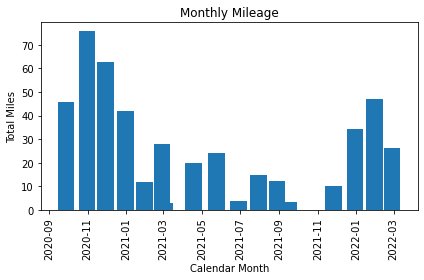

In [58]:
plt.bar(df_agg["Date"], df_agg["Cum_Miles_Monthly"], width=26.0)
plt.xticks(rotation="vertical")
plt.xlabel("Calendar Month")
plt.ylabel("Total Miles")
plt.title("Monthly Mileage")
plt.tight_layout()
plt.savefig("Miles.pdf", bbox_inches="tight")
plt.show()

In [59]:
df.head()

,Date,Activity Type,Distance,Time,Avg HR,Max HR,Avg Speed,Cum_Min,Sec,Cum_Sec_Monthly,Cum_Min_Monthly,Cum_Hr_Monthly,Cum_Miles_Monthly,Base_Run_Pace,Base_Run_HR,Base_Run_Pace_Sec,Fast_Run_Pace,Fast_Run_HR,Fast_Run_Pace_Sec,Base_Run_Pace_Avg_Sec,Base_Run_HR_Avg,Fast_Run_Pace_Avg_Sec,Fast_Run_HR_Avg,Base_Run_Pace_Avg,Fast_Run_Pace_Avg
0,2022-02-27,Running,13.05,01:57:41,174.0,193,9:01,117,41,165,322,5.37,26.36,NaN,NaN,NaN,9:01,174.0,541.0,653.5,140.5,541.0,174.0,10:53,9:01
1,2022-02-24,Cardio,0.00,00:18:58,159.0,183,--,18,58,165,322,5.37,26.36,NaN,NaN,NaN,NaN,NaN,NaN,653.5,140.5,541.0,174.0,10:53,9:01
2,2022-02-12,Cardio,0.00,00:38:09,179.0,193,--,38,9,165,322,5.37,26.36,NaN,NaN,NaN,NaN,NaN,NaN,653.5,140.5,541.0,174.0,10:53,9:01
3,2022-02-09,Running,4.30,00:44:13,139.0,153,10:16,44,13,165,322,5.37,26.36,10:16,139.0,616.0,NaN,NaN,NaN,653.5,140.5,541.0,174.0,10:53,9:01
4,2022-02-07,Running,9.01,01:43:44,142.0,156,11:31,103,44,165,322,5.37,26.36,11:31,142.0,691.0,NaN,NaN,NaN,653.5,140.5,541.0,174.0,10:53,9:01


In [60]:
df_agg["Base_Run_Pace_Avg_Sec"].min()

597.0

In [61]:
min_pace = df_agg["Base_Run_Pace_Avg_Sec"].min() / 60

In [62]:
min_pace_date = df_agg["Date"][
    df_agg["Base_Run_Pace_Avg_Sec"] == df_agg["Base_Run_Pace_Avg_Sec"].min()
]

In [63]:
min_pace

9.95

In [64]:
min_pace_date

35   2020-12-31
Name: Date, dtype: datetime64[ns]

In [65]:
max_pace = df_agg["Base_Run_Pace_Avg_Sec"].max() / 60

In [66]:
max_pace_date = df_agg["Date"][
    df_agg["Base_Run_Pace_Avg_Sec"] == df_agg["Base_Run_Pace_Avg_Sec"].max()
]

In [67]:
max_pace

12.575

In [68]:
max_pace_date

41   2021-06-28
Name: Date, dtype: datetime64[ns]

In [69]:
other_pace = (
    df_agg["Base_Run_Pace_Avg_Sec"][df_agg["Date"] == "2021-09-16"] / 60
)

In [70]:
other_date = "2021-09-16"

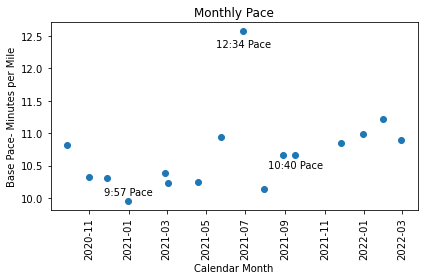

In [71]:
plt.scatter(df_agg["Date"], df_agg["Base_Run_Pace_Avg_Sec"] / 60)
plt.text(
    min_pace_date, min_pace + 0.10, "9:57 Pace", horizontalalignment="center"
)

plt.text(
    max_pace_date, max_pace - 0.25, "12:34 Pace", horizontalalignment="center"
)

plt.text(
    other_date, other_pace - 0.20, "10:40 Pace", horizontalalignment="center"
)

plt.xticks(rotation="vertical")
plt.xlabel("Calendar Month")
plt.ylabel("Base Pace- Minutes per Mile")
plt.title("Monthly Pace")
plt.tight_layout()
plt.savefig("Pace.pdf")
plt.show()

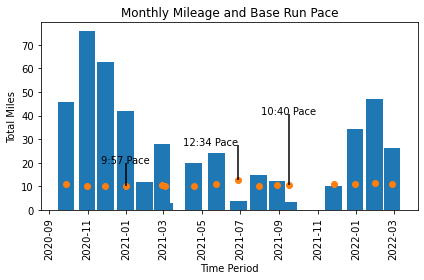

In [72]:
plt.bar(df_agg["Date"], df_agg["Cum_Miles_Monthly"], width=26.0, zorder=1)
plt.scatter(df_agg["Date"], df_agg["Base_Run_Pace_Avg_Sec"] / 60, zorder=2)
plt.text(
    min_pace_date, min_pace + 10, "9:57 Pace", horizontalalignment="center"
)

plt.vlines(x=min_pace_date, ymin=min_pace, ymax=min_pace + 10, color="black")
plt.text(
    max_pace_date, max_pace + 15, "12:34 Pace", horizontalalignment="right"
)

plt.vlines(x=max_pace_date, ymin=max_pace, ymax=max_pace + 15, color="black")
plt.text(
    other_date, other_pace + 30, "10:40 Pace", horizontalalignment="center"
)

plt.vlines(x=other_date, ymin=other_pace, ymax=other_pace + 30, color="black")
plt.xticks(rotation="vertical")
plt.xlabel("Time Period")
plt.ylabel("Total Miles")
plt.title("Monthly Mileage and Base Run Pace")
plt.tight_layout()
plt.savefig("Pace_and_Miles.pdf")
plt.show()